In [1]:
# import dependencies
import pandas as pd
import datetime
import seaborn as sb

In [2]:
# import csv file
file = 'space_missions.csv'
space_missions_df = pd.read_csv(file, encoding = 'iso8859-1')

In [3]:
space_missions_df.sample(5)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
3472,ULA,"SLC-17B, Cape Canaveral AFS, Florida, USA",2007-09-27,11:34:00,Delta II 7925H,Dawn,Retired,NaN,Success
1925,RVSN USSR,"Site 43/3, Plesetsk Cosmodrome, Russia",1981-06-19,19:37:00,Molniya-M /Block 2BL,Cosmos 1278,Retired,NaN,Success
42,US Air Force,"SLC-1E (75-3-5), Vandenberg AFB, California, USA",1959-08-19,19:24:00,Thor-DM18 Agena-A,Discoverer 6,Retired,NaN,Success
3742,VKS RF,"Site 133/3, Plesetsk Cosmodrome, Russia",2013-11-22,12:02:00,Rokot/Briz KM,SWARM,Retired,41.8,Success
1043,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1971-12-17,10:39:00,Cosmos-2I (63SM),Cosmos 467,Retired,NaN,Success


# Cleaning DataFrame

In [4]:
space_missions_df.count()

Company          4630
Location         4630
Date             4630
Time             4503
Rocket           4630
Mission          4630
RocketStatus     4630
Price            1265
MissionStatus    4630
dtype: int64

In [5]:
space_missions_df['Location']

0             Site 1/5, Baikonur Cosmodrome, Kazakhstan
1             Site 1/5, Baikonur Cosmodrome, Kazakhstan
2              LC-18A, Cape Canaveral AFS, Florida, USA
3              LC-26A, Cape Canaveral AFS, Florida, USA
4              LC-18A, Cape Canaveral AFS, Florida, USA
                             ...                       
4625            SLC-4E, Vandenberg SFB, California, USA
4626    LC-101, Wenchang Satellite Launch Center, China
4627         LC-39A, Kennedy Space Center, Florida, USA
4628             Jiuquan Satellite Launch Center, China
4629       LC-3, Xichang Satellite Launch Center, China
Name: Location, Length: 4630, dtype: object

In [6]:
space_missions_df.Location.str.contains('USA')

0       False
1       False
2        True
3        True
4        True
        ...  
4625     True
4626    False
4627     True
4628    False
4629    False
Name: Location, Length: 4630, dtype: bool

**Create DataFrame for USA Companies Only**

In [7]:
usa_space_missions_df = space_missions_df[space_missions_df['Location'].str.contains('USA')]
usa_space_missions_df.sample(5)

,Company,Location,Date,Time,Rocket,Mission,RocketStatus,Price,MissionStatus
4506,Astra,"LP-3B, Pacific Spaceport Complex, Kodiak, Alas...",2021-11-20,06:16:00,Rocket 3,STP-27AD2,Active,2.5,Success
3907,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA",2016-08-19,04:52:00,"Delta IV Medium+ (4,2)",AFSPC-6,Retired,164,Success
1485,Martin Marietta,"SLC-40, Cape Canaveral AFS, Florida, USA",1976-03-14,01:25:00,Titan III(23)C,"LES-8, LES-9, Solrad-11a, Solrad-11b",Retired,NaN,Success
2578,Boeing,"SLC-17A, Cape Canaveral AFS, Florida, USA",1991-07-04,02:32:00,Delta II 7925,USA-71 (GPS IIA-2),Retired,NaN,Success
3117,NASA,"LC-39A, Kennedy Space Center, Florida, USA",2000-02-11,16:43:00,Space Shuttle Endeavour,STS-99,Retired,450,Success


In [8]:
usa_space_missions_df.count()

Company          1467
Location         1467
Date             1467
Time             1444
Rocket           1467
Mission          1467
RocketStatus     1467
Price             591
MissionStatus    1467
dtype: int64

**Remove 'Price' and 'Time' Columns, Too Many NaNs**

In [9]:
usa_space_missions_df.isnull().sum()

Company            0
Location           0
Date               0
Time              23
Rocket             0
Mission            0
RocketStatus       0
Price            876
MissionStatus      0
dtype: int64

In [10]:
usa_space_missions_dropped = usa_space_missions_df.drop(['Time', 'Price'], axis = 1)
usa_space_missions_dropped.sample(5)

,Company,Location,Date,Rocket,Mission,RocketStatus,MissionStatus
2209,Martin Marietta,"SLC-4E, Vandenberg AFB, California, USA",1985-08-28,Titan 34D,KH-11,Retired,Failure
3444,SpaceX,"Omelek Island, Ronald Reagan Ballistic Missile...",2007-03-21,Falcon 1,DemoSat,Retired,Failure
691,Martin Marietta,"SLC-41, Cape Canaveral AFS, Florida, USA",1968-09-26,Titan IIIC,"LES-6, OV2-5, OV5-2, OV5-4",Retired,Success
4090,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2018-06-29,Falcon 9 Block 4,CRS-15,Retired,Success
3726,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA",2013-08-08,"Delta IV Medium+ (5,4)",WGS-6,Retired,Success


**Convert Date to Month**

In [11]:
usa_space_missions_dropped['Year'] = pd.DatetimeIndex(usa_space_missions_dropped['Date']).year

In [12]:
usa_space_missions_dropped.sample(5)

,Company,Location,Date,Rocket,Mission,RocketStatus,MissionStatus,Year
3004,Boeing,"SLC-17A, Cape Canaveral AFS, Florida, USA",1998-04-24,Delta II 7920-10C,Globalstar-2,Retired,Success,1998
2087,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1983-11-18,Atlas-E/F Star-37S-ISS,DMSP 5D-2/F7,Retired,Success,1983
123,General Dynamics,"SLC-3W, Vandenberg AFB, California, USA",1961-09-09,Atlas-LV3 Agena-B,Samos 3,Retired,Failure,1961
52,US Air Force,"SLC-1E (75-3-5), Vandenberg AFB, California, USA",1960-02-19,Thor-DM18 Agena-A,Discoverer 10,Retired,Failure,1960
364,General Dynamics,"SLC-4E, Vandenberg AFB, California, USA",1965-06-25,Atlas-SLV3 Agena-D,KH-7 Gambit 4019,Retired,Success,1965


# Analysis

**Total Number of Missions**

In [13]:
total_missions = usa_space_missions_dropped.MissionStatus.count()
total_missions

1467

**Total Number of Companies**

In [14]:
total_companies = usa_space_missions_dropped.Company.nunique()
total_companies

19

**How Many Missions Occured Per Year?**

In [15]:
missions_per_year = usa_space_missions_dropped.groupby('Year').Year.count()
print(missions_per_year.to_string())

Year
1957     1
1958    23
1959    16
1960    30
1961    43
1962    60
1963    17
1964    24
1965    33
1966    47
1967    26
1968    22
1969    17
1970    11
1971    16
1972    17
1973    17
1974    10
1975    15
1976    13
1977    14
1978    21
1979     9
1980    11
1981    13
1982    11
1983    13
1984    17
1985    16
1986     6
1987     6
1988     7
1989    16
1990    26
1991    18
1992    27
1993    24
1994    26
1995    30
1996    33
1997    36
1998    36
1999    31
2000    28
2001    22
2002    17
2003    23
2004    16
2005    12
2006    18
2007    19
2008    15
2009    25
2010    15
2011    18
2012    13
2013    19
2014    23
2015    21
2016    27
2017    30
2018    33
2019    24
2020    42
2021    57
2022    45


**How Many Missions Did Each Company Have?**

In [16]:
missions_per_company = usa_space_missions_dropped.groupby('Company').Mission.count()
missions_per_company

Company
AMBA                  7
Astra                 7
Blue Origin          21
Boeing              136
Douglas               1
EER                   1
Firefly               1
General Dynamics    251
ILS                  40
Lockheed             79
Martin Marietta     114
NASA                203
Northrop             87
SpaceX              182
ULA                 151
US Air Force        161
US Navy              17
Virgin Galactic       3
Virgin Orbit          5
Name: Mission, dtype: int64

**How Many Failed Missions?**

In [17]:
total_failed = usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Failure'].count()
total_failed

Company          134
Location         134
Date             134
Rocket           134
Mission          134
RocketStatus     134
MissionStatus    134
Year             134
dtype: int64

**How Many Sucessful Missions?**

In [18]:
total_success = usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Success'].count()
total_success

Company          1298
Location         1298
Date             1298
Rocket           1298
Mission          1298
RocketStatus     1298
MissionStatus    1298
Year             1298
dtype: int64

**How Many Failed Missions Per Year?**

In [19]:
failed_missions_per_year = usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Failure']\
.groupby('Year').MissionStatus.count()
failed_missions_per_year

Year
1957     1
1958    16
1959     8
1960    14
1961    13
1962     8
1963     4
1964     4
1965     6
1966     2
1967     2
1968     1
1970     1
1971     2
1972     2
1973     1
1974     1
1975     3
1977     1
1978     1
1980     2
1981     1
1984     1
1985     1
1986     2
1987     1
1990     1
1991     1
1992     1
1993     3
1994     1
1995     3
1996     1
1997     1
1998     2
1999     4
2001     1
2003     1
2006     1
2007     1
2008     1
2009     1
2011     1
2014     1
2015     1
2020     3
2021     3
2022     2
Name: MissionStatus, dtype: int64

**How Many Successful Missions Per Year?**

In [20]:
successful_missions_per_year = usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Success']\
.groupby('Year').MissionStatus.count()
print(successful_missions_per_year.to_string())

Year
1958     5
1959     6
1960    16
1961    27
1962    50
1963    13
1964    19
1965    26
1966    40
1967    21
1968    19
1969    17
1970     9
1971    14
1972    15
1973    16
1974     9
1975    12
1976    13
1977    13
1978    20
1979     9
1980     9
1981    11
1982    11
1983    13
1984    16
1985    15
1986     4
1987     5
1988     6
1989    16
1990    25
1991    16
1992    26
1993    21
1994    24
1995    26
1996    32
1997    35
1998    34
1999    27
2000    28
2001    21
2002    17
2003    22
2004    15
2005    12
2006    17
2007    17
2008    14
2009    24
2010    15
2011    17
2012    12
2013    19
2014    22
2015    20
2016    26
2017    30
2018    33
2019    24
2020    37
2021    52
2022    43


**Companies with the Most Successful Missions**

In [21]:
companies_success_missions = usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Success']\
.groupby('Company').MissionStatus.count()
companies_success_missions

Company
AMBA                  3
Astra                 2
Blue Origin          21
Boeing              131
Douglas               1
General Dynamics    203
ILS                  40
Lockheed             74
Martin Marietta     100
NASA                186
Northrop             78
SpaceX              172
ULA                 150
US Air Force        129
US Navy               2
Virgin Galactic       2
Virgin Orbit          4
Name: MissionStatus, dtype: int64

**Companies with the Most Failed Missions**

In [22]:
companies_failed_missions = usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Failure']\
.groupby('Company').MissionStatus.count()
companies_failed_missions

Company
AMBA                 3
Astra                5
Boeing               3
EER                  1
Firefly              1
General Dynamics    37
Lockheed             5
Martin Marietta     11
NASA                11
Northrop             7
SpaceX               5
US Air Force        30
US Navy             14
Virgin Orbit         1
Name: MissionStatus, dtype: int64

**Rockets with the Most Successful Missions**

In [23]:
rockets_success = usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Success']\
.groupby('Rocket').MissionStatus.count()
rockets_success

Rocket
Antares 110               2
Antares 120               2
Antares 230               5
Antares 230+              6
Ares 1-X                  1
                         ..
Titan IV(404)B            3
Titan IV(405)A            2
Titan IV(405)B            1
Titan-III(33)B Agena-D    2
Vanguard                  2
Name: MissionStatus, Length: 151, dtype: int64

In [24]:
rockets_success.sort_values(ascending = False)

Rocket
Falcon 9 Block 5           111
Delta II 7925               60
Atlas-SLV3 Agena-D          41
Space Shuttle Discovery     39
Atlas V 401                 38
                          ... 
Thor DM-18 Able-III          1
Thor DM-18 Able-II           1
Delta II 7920-10L            1
Delta II 7920-8              1
SM-65B Atlas                 1
Name: MissionStatus, Length: 151, dtype: int64

**Rockets with the Most Failed Missions**

In [25]:
rockets_failed = usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Failure']\
.groupby('Rocket').MissionStatus.count()
rockets_failed

Rocket
Antares 130               1
Athena I                  1
Athena II                 1
Atlas I                   3
Atlas-D Able              3
                         ..
Titan IV(401)B            1
Titan IV(402)B            1
Titan IV(403)A            1
Titan-III(33)B Agena-D    1
Vanguard                  8
Name: MissionStatus, Length: 67, dtype: int64

In [26]:
rockets_failed.sort_values(ascending = False)

Rocket
Vanguard              8
Thor DM-21 Agena-B    8
Atlas-LV3 Agena-B     7
Thor-DM18 Agena-A     7
NOTS-EV-1 Pilot II    6
                     ..
Firefly Alpha         1
LauncherOne           1
Athena I              1
Saturn IB             1
Mercury-Redstone      1
Name: MissionStatus, Length: 67, dtype: int64

**Retired Rockets**

In [27]:
retired_rockets = usa_space_missions_dropped[usa_space_missions_dropped['RocketStatus'] == 'Retired']
retired_rockets

,Company,Location,Date,Rocket,Mission,RocketStatus,MissionStatus,Year
2,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1957-12-06,Vanguard,Vanguard TV3,Retired,Failure,1957
3,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-02-01,Juno I,Explorer 1,Retired,Success,1958
4,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-02-05,Vanguard,Vanguard TV3BU,Retired,Failure,1958
5,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA",1958-03-05,Juno I,Explorer 2,Retired,Failure,1958
6,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA",1958-03-17,Vanguard,Vanguard 1,Retired,Success,1958
...,...,...,...,...,...,...,...,...
4178,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA",2019-04-17,Antares 230,CRS NG-11,Retired,Success,2019
4216,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA",2019-08-22,"Delta IV Medium+ (4,2)",GPS III SV02,Retired,Success,2019
4272,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-02-10,Atlas V 411,Solar Orbiter,Retired,Success,2020
4293,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-05-17,Atlas V 501,OTV-6 (USSF-7),Retired,Success,2020


In [28]:
retired_rockets.groupby('Rocket').first()

,Company,Location,Date,Mission,RocketStatus,MissionStatus,Year
Rocket,,,,,,,
Antares 110,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA",2013-04-21,Antares A-ONE,Retired,Success,2013
Antares 120,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA",2014-01-09,CRS Orb-1,Retired,Success,2014
Antares 130,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA",2014-10-28,CRS Orb-3,Retired,Failure,2014
Antares 230,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA",2016-10-17,CRS OA-5,Retired,Success,2016
Ares 1-X,NASA,"LC-39B, Kennedy Space Center, Florida, USA",2009-10-28,Ares 1-X Test Flight,Retired,Success,2009
...,...,...,...,...,...,...,...
Titan IV(404)B,Lockheed,"SLC-4E, Vandenberg AFB, California, USA",1999-05-22,NROL-9 (Misty),Retired,Success,1999
Titan IV(405)A,Martin Marietta,"SLC-41, Cape Canaveral AFS, Florida, USA",1990-06-08,SLDCOM & NOSS 3x,Retired,Success,1990
Titan IV(405)B,Lockheed,"SLC-40, Cape Canaveral AFS, Florida, USA",2005-04-30,NROL-16 (Onyx),Retired,Success,2005


**Active Rockets**

In [29]:
active_rockets = usa_space_missions_dropped[usa_space_missions_dropped['RocketStatus'] == 'Active']
active_rockets

,Company,Location,Date,Rocket,Mission,RocketStatus,MissionStatus,Year
2741,Northrop,"SLC-576E, Vandenberg AFB, California, USA",1994-03-13,Minotaur C (Taurus),STEP Mission 0 & DARPASAT,Active,Success,1994
2753,Northrop,"Stargazer, Vandenberg AFB, California, USA",1994-06-27,Pegasus XL,STEP-1,Active,Failure,1994
2819,Northrop,"Stargazer, Vandenberg AFB, California, USA",1995-06-22,Pegasus XL,STEP-3,Active,Failure,1995
2866,Northrop,"Stargazer, Vandenberg AFB, California, USA",1996-03-09,Pegasus XL,REX II,Active,Success,1996
2885,Northrop,"Stargazer, Vandenberg AFB, California, USA",1996-07-02,Pegasus XL,TOMS,Active,Success,1996
...,...,...,...,...,...,...,...,...
4619,Astra,"SLC-46, Cape Canaveral SFS, Florida, USA",2022-07-12,Rocket 3,TROPICS Flight 1,Active,Failure,2022
4622,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2022-07-15,Falcon 9 Block 5,CRS SpX-25,Active,Success,2022
4624,SpaceX,"SLC-40, Cape Canaveral SFS, Florida, USA",2022-07-17,Falcon 9 Block 5,Starlink Group 4-22,Active,Success,2022
4625,SpaceX,"SLC-4E, Vandenberg SFB, California, USA",2022-07-22,Falcon 9 Block 5,Starlink Group 3-2,Active,Success,2022


In [30]:
active_rockets.groupby('Rocket').first()

,Company,Location,Date,Mission,RocketStatus,MissionStatus,Year
Rocket,,,,,,,
Antares 230+,Northrop,"LP-0A, Wallops Flight Facility, Virginia, USA",2019-11-02,CRS NG-12,Active,Success,2019
Atlas V 401,ILS,"SLC-41, Cape Canaveral AFS, Florida, USA",2002-08-21,Hot Bird 6,Active,Success,2002
Atlas V 421,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2007-10-11,WSG-1,Active,Success,2007
Atlas V 531,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2010-08-14,AEHF-1,Active,Success,2010
Atlas V 541,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2011-11-26,Mars Science Laboratory,Active,Success,2011
Atlas V 551,ILS,"SLC-41, Cape Canaveral AFS, Florida, USA",2006-01-19,New Horizons,Active,Success,2006
Atlas V N22,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2019-12-20,Starliner OFT,Active,Success,2019
Delta IV Heavy,Boeing,"SLC-37B, Cape Canaveral AFS, Florida, USA",2004-12-21,DemoSat and 3CS-1 & 2,Active,Partial Failure,2004
Falcon 9 Block 5,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2018-05-11,Bangabandhu-1,Active,Success,2018


**Companies with the Most Retired Rockets**

In [31]:
retired_rockets_companies = usa_space_missions_dropped[usa_space_missions_dropped['RocketStatus'] == 'Retired']\
.groupby('Company').RocketStatus.count()
retired_rockets_companies

Company
AMBA                  7
Boeing              135
Douglas               1
EER                   1
General Dynamics    251
ILS                  36
Lockheed             79
Martin Marietta     114
NASA                203
Northrop             20
SpaceX               62
ULA                  68
US Air Force        161
US Navy              17
Name: RocketStatus, dtype: int64

**Companies with the Most Active Rockets**

In [32]:
active_rockets_companies = usa_space_missions_dropped[usa_space_missions_dropped['RocketStatus'] == 'Active']\
.groupby('Company').RocketStatus.count()
active_rockets_companies

Company
Astra                7
Blue Origin         21
Boeing               1
Firefly              1
ILS                  4
Northrop            67
SpaceX             120
ULA                 83
Virgin Galactic      3
Virgin Orbit         5
Name: RocketStatus, dtype: int64

**Total Rockets Per Company**

In [33]:
total_rockets_per_company = usa_space_missions_dropped.groupby('Company').Rocket.count()
total_rockets_per_company 

Company
AMBA                  7
Astra                 7
Blue Origin          21
Boeing              136
Douglas               1
EER                   1
Firefly               1
General Dynamics    251
ILS                  40
Lockheed             79
Martin Marietta     114
NASA                203
Northrop             87
SpaceX              182
ULA                 151
US Air Force        161
US Navy              17
Virgin Galactic       3
Virgin Orbit          5
Name: Rocket, dtype: int64

# Visualization

**Missions Per Year**

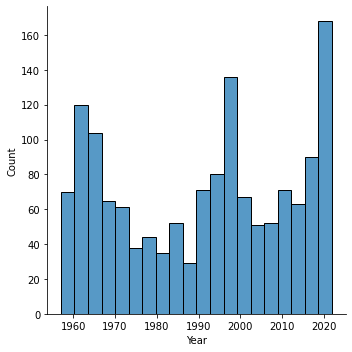

In [42]:
sb.displot(usa_space_missions_dropped, x = 'Year', bins = 20)

**Missions Per Company**

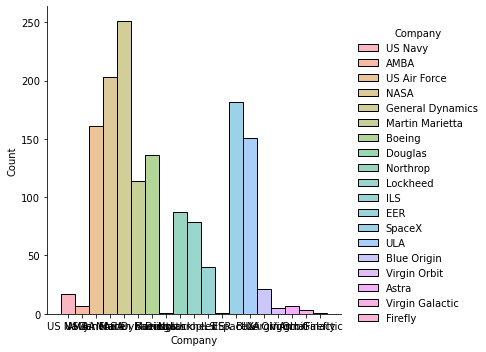

In [45]:
sb.displot(usa_space_missions_dropped, x = 'Company', hue = 'Company')

**Failed Missions Per Year**

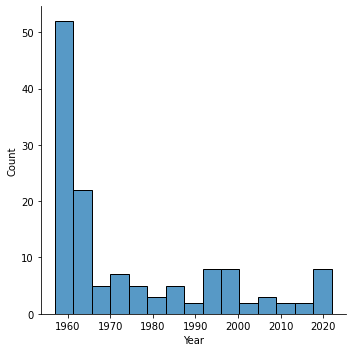

In [49]:
sb.displot(usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Failure'], x = 'Year', bins = 15)

**Successful Missions Per Year**

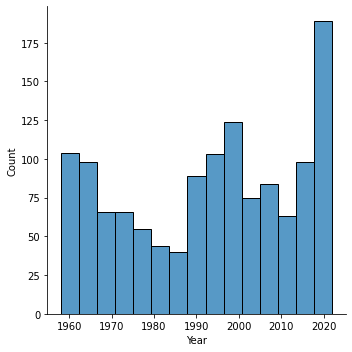

In [50]:
sb.displot(usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Success'], x = 'Year', bins = 15)

**Most Failed Missions Per Company**

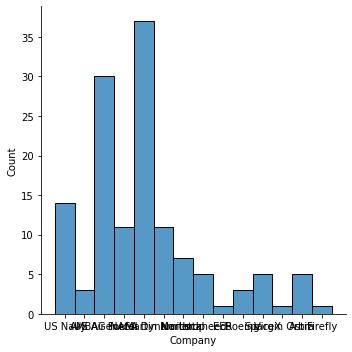

In [52]:
sb.displot(usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Failure'], x = 'Company', bins = 19)

**Most Successful Missions Per Company**

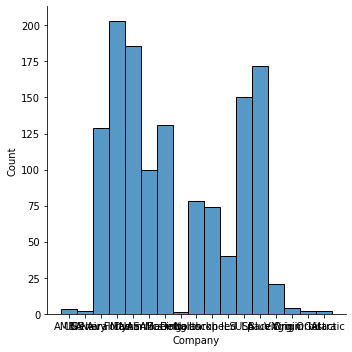

In [53]:
sb.displot(usa_space_missions_dropped[usa_space_missions_dropped['MissionStatus'] == 'Success'], x = 'Company', bins = 19)

**Most Failed Missions Per Rocket**

**Most Successful Missions Per Rocket**

**Is there a correlation between Rocket Status and Mission Status?**

**Number of Retired Rockets Per Company**

**Number of Active Rockets Per Company**

**Total Rockets Per Company**